# Lasso Regression

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [9]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

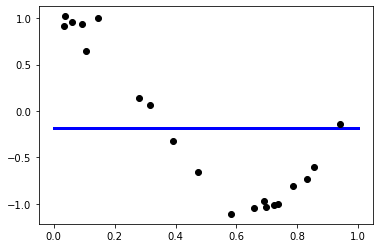

In [10]:
clf = Lasso(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


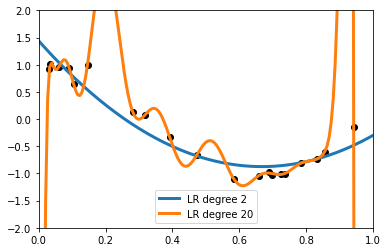

In [11]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (ElasticNet Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

LR degree 20
ElasticNet alpha 1
ElasticNet alpha 10 000
ElasticNet alpha 0.0001


/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007827158905129972, tolerance: 0.0012871638215135087
  model = cd_fast.enet_coordinate_descent(


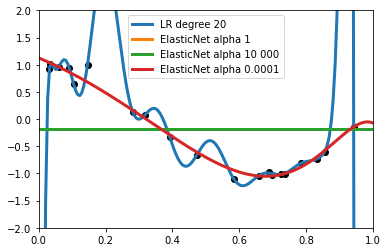

In [12]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))
models.append(('ElasticNet alpha 1', make_pipeline(PolynomialFeatures(20), linear_model.ElasticNet(alpha=1.0)) ))
models.append(('ElasticNet alpha 10 000', make_pipeline(PolynomialFeatures(20), linear_model.ElasticNet(alpha=10000)) ))
models.append(('ElasticNet alpha 0.0001', make_pipeline(PolynomialFeatures(20), linear_model.ElasticNet(alpha=0.0001)) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show() 

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import  metrics
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.ElasticNet()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7,8,9,10],
                               'elasticnet__alpha': [0.00001, 0.0001, 0.01, 1, 10, 100, 1000]
                               },
                    cv=5,
                    refit=True)

grid.fit(x, y)
print(grid.best_params_)

/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0942811063832673, tolerance: 0.000631106079142576
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.038426562334470095, tolerance: 0.001016707922525365
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08070879178565453, tolerance: 0.0010698940113687187
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/li

{'elasticnet__alpha': 1e-05, 'polynomialfeatures__degree': 10}


/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08503127880761514, tolerance: 0.0012871638215135087
  model = cd_fast.enet_coordinate_descent(


{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 1}

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [14]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn import  metrics
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.ElasticNet()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7,8,9,10],
                               'elasticnet__alpha': [0.00001, 0.0001, 0.01, 1, 10, 100, 1000]
                               },
                    cv=5,
                    refit=True)

grid.fit(X, y)
print(grid.best_params_)
print(metrics.r2_score(y, grid.predict(X)))

/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.72824254522987, tolerance: 0.43829494374999994
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.357938625698925, tolerance: 0.42183797500000003
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.565115804389944, tolerance: 0.45029244375
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/si

/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.815621497072463, tolerance: 0.43829494374999994
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.449772984217963, tolerance: 0.42183797500000003
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.26187664803689, tolerance: 0.45029244375
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/si

/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.430756216878333, tolerance: 0.45029244375
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.585052429881207, tolerance: 0.41992074374999994
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.620885941417384, tolerance: 0.4347586937499999
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/sit

/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.711947987262786, tolerance: 0.41992074374999994
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.73542894254744, tolerance: 0.4347586937499999
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.60150256768714, tolerance: 0.43829494374999994
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9

/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.339126554512006, tolerance: 0.45029244375
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.989795167798981, tolerance: 0.41992074374999994
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.32275122385884, tolerance: 0.4347586937499999
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/sit

/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.6691653957302, tolerance: 0.42183797500000003
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.809193695921806, tolerance: 0.45029244375
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.391257200948637, tolerance: 0.41992074374999994
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/sit

/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.72243807219774, tolerance: 0.45029244375
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.294545161711415, tolerance: 0.41992074374999994
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.122373149529054, tolerance: 0.4347586937499999
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/sit

/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.49184009567683, tolerance: 0.43829494374999994
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.30286112326885, tolerance: 0.42183797500000003
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.19976509438302, tolerance: 0.45029244375
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site

/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.3401335058316, tolerance: 0.4347586937499999
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.79920597556793, tolerance: 0.43829494374999994
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.15635267328481, tolerance: 0.42183797500000003
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/

{'elasticnet__alpha': 1, 'polynomialfeatures__degree': 3}
0.9910596362245003


/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.44305264727873, tolerance: 0.41992074374999994
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.93652755109618, tolerance: 0.4347586937499999
  model = cd_fast.enet_coordinate_descent(
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.34101877054138, tolerance: 0.541714875
  model = cd_fast.enet_coordinate_descent(
